In [1]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import BayesianEstimator
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
from pgmpy.inference import VariableElimination

In [2]:
def percentual_Transform(s):
    
    l = s.split("\/")
    l = list(map(lambda n: int(n),l))
    p = l[0]/l[1] * 100
    
    return p

In [3]:
import json

with open("../../../../data/Weakness.json", 'r+') as weakfile:
    weak = json.load(weakfile)
    weakfile.close()
    
def Generate_Multiplicator(x):
    EnemyType = x["Enemy Type"]
    MoveType = x["Type Move"]
    weakness = 1
    EnemyType = EnemyType.split(",")
    for i in range(len(EnemyType)):
        if i == 0:
            EnemyType[i] = EnemyType[i][2:-1]
        elif i == 1:
            EnemyType[1] = EnemyType[1][2:-2]
    for Type in EnemyType:
        if not Type.isalnum():
            continue
        weakness = weakness * weak[MoveType][Type] 
    return weakness

def percentual_Transform(s):
    
    l = s.split("\/")
    l = list(map(lambda n: int(n),l))
    p = l[0]/l[1] * 100
    
    return p

def check_stab(df):
    new_col = []
    for i in range(len(df)):
        if df['Pokemon Type'][i].split('\'')[1] == df['Type Move'][i] or (len(df['Pokemon Type'][i].split('\'')) > 3 and df['Pokemon Type'][i].split('\'')[3] == df['Type Move'][i]):
            new_col.append(True)
        else:
            new_col.append(False)
    df = df.assign(stab=new_col)
    df = df.drop(['Pokemon Type', 'Type Move'], axis= 1)
    return df

In [4]:
df = pd.read_csv("../parsing Dataset/log/Dataset.csv")

df["UserHP"] = df["UserHP"].map(percentual_Transform)
df["SuffererHP"] = df["SuffererHP"].map(percentual_Transform)

df.rename({"UserHP": "Pokemon HP","SuffererHP": "Enemy HP","TypeM": "Type Move",
           "categoryMove": "Category Move","TypesS" : "Enemy Type","TypesU":"Pokemon Type",
           "power":"Power"}, axis=1, inplace=True)
df["Multiplicator"] = df[["Enemy Type","Type Move"]].apply(Generate_Multiplicator, axis=1)
df = df.drop(["Enemy Type"], axis= 1)
#df["Choose"] = np.ones(len(df)).astype(int)
df = check_stab(df)
df["Weather"] = df["Weather"].str.rstrip()
df

,User,Sufferer,name move,Power,Pokemon HP,Enemy HP,Weather,Category Move,Choose,Multiplicator,stab
0,Flygon,Aerodactyl\n,U-turn,70,100.000000,100.000000,none,physical,1.0,0.50,False
1,Aerodactyl,Bronzong\n,Stealth Rock,0,100.000000,100.000000,none,status,1.0,0.50,True
2,Bronzong,Bronzong\n,Trick Room,0,100.000000,100.000000,none,status,1.0,0.25,True
3,Bronzong,Forretress\n,Earthquake,100,100.000000,100.000000,none,physical,1.0,1.00,False
4,Bronzong,Forretress\n,Trick Room,0,100.000000,100.000000,none,status,0.0,0.25,True
...,...,...,...,...,...,...,...,...,...,...,...
1025,Persian,Persian\n,Nasty Plot,0,100.000000,100.000000,none,status,1.0,1.00,False
1026,Entei,Persian\n,Sacred Fire,100,72.638436,100.000000,none,physical,1.0,1.00,True
1027,Persian,Entei\n,Dark Pulse,80,100.000000,72.638436,none,special,1.0,1.00,False
1028,Persian,Entei\n,Nasty Plot,0,100.000000,100.000000,none,status,0.0,1.00,False


In [5]:
from sklearn.preprocessing import KBinsDiscretizer

enc = KBinsDiscretizer(n_bins=10, encode='ordinal',strategy='uniform')
enc.fit(df[["Pokemon HP"]])
df["Pokemon HP"] = enc.transform(df[["Pokemon HP"]]).astype(int)
enc.fit(df[["Enemy HP"]])
df["Enemy HP"] = enc.transform(df[["Enemy HP"]]).astype(int)
enc = KBinsDiscretizer(n_bins=10, encode='ordinal',strategy='uniform')
enc.fit(df[["Power"]])
df["Power"] = enc.transform(df[["Power"]]).astype(int)
df

C:\Users\albge\PycharmProjects\showdownBayesian\venv\lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\albge\PycharmProjects\showdownBayesian\venv\lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\albge\PycharmProjects\showdownBayesian\venv\lib\site-packages\sklearn\preprocessing\_discretization.py:248: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warn

,User,Sufferer,name move,Power,Pokemon HP,Enemy HP,Weather,Category Move,Choose,Multiplicator,stab
0,Flygon,Aerodactyl\n,U-turn,2,9,9,none,physical,1.0,0.50,False
1,Aerodactyl,Bronzong\n,Stealth Rock,0,9,9,none,status,1.0,0.50,True
2,Bronzong,Bronzong\n,Trick Room,0,9,9,none,status,1.0,0.25,True
3,Bronzong,Forretress\n,Earthquake,4,9,9,none,physical,1.0,1.00,False
4,Bronzong,Forretress\n,Trick Room,0,9,9,none,status,0.0,0.25,True
...,...,...,...,...,...,...,...,...,...,...,...
1025,Persian,Persian\n,Nasty Plot,0,9,9,none,status,1.0,1.00,False
1026,Entei,Persian\n,Sacred Fire,4,7,9,none,physical,1.0,1.00,True
1027,Persian,Entei\n,Dark Pulse,3,9,7,none,special,1.0,1.00,False
1028,Persian,Entei\n,Nasty Plot,0,9,9,none,status,0.0,1.00,False


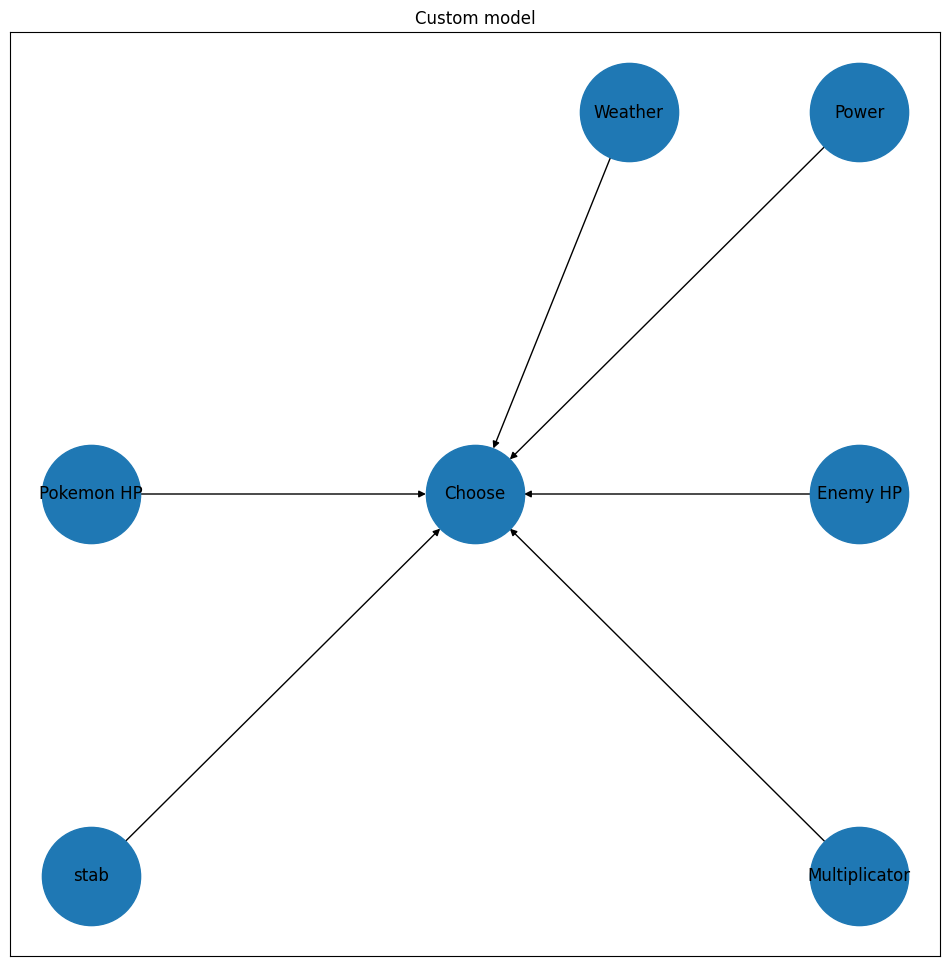

In [6]:
custom_model = BayesianNetwork([('Pokemon HP', 'Choose'), ('Enemy HP', 'Choose'),
                              ('stab', 'Choose'), ('Multiplicator', 'Choose'), ('Power', 'Choose'),
                               ("Weather","Choose")])
pos = {'Pokemon HP': [0.75, -0.5], 'Enemy HP': [1.25, -0.5],
       "stab": [0.75, -1.], 'Multiplicator': [1.25, -1],
       'Power': [1.25, 0], "Weather" : [1.1, 0],
       'Choose': [1, -0.5]}
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
nx.draw_networkx(custom_model, pos=pos, ax=ax, node_size=5000)
ax.set_title('Custom model')
fig.savefig('custom_bn')

In [7]:

estimator = BayesianEstimator(model=custom_model, data=df)

cpds = []
for node in custom_model.nodes():
    cpds.append(estimator.estimate_cpd(node=node, 
                                       prior_type="BDeu", 
                                       equivalent_sample_size=10))
custom_model.add_cpds(*cpds)

print('Checking the model...')
print(f'The model is {custom_model.check_model()}\n\n')

for cpd in [cpd for cpd in custom_model.get_cpds()]:
    print(f'CPD for {cpd.variable}:')
    print(cpd)
    
choose = custom_model.get_cpds("Choose")
print(choose)

Checking the model...
The model is True


CPD for Pokemon HP:
+---------------+------------+
| Pokemon HP(0) | 0.00769231 |
+---------------+------------+
| Pokemon HP(1) | 0.00673077 |
+---------------+------------+
| Pokemon HP(2) | 0.00865385 |
+---------------+------------+
| Pokemon HP(3) | 0.0942308  |
+---------------+------------+
| Pokemon HP(4) | 0.00576923 |
+---------------+------------+
| Pokemon HP(5) | 0.0144231  |
+---------------+------------+
| Pokemon HP(6) | 0.0336538  |
+---------------+------------+
| Pokemon HP(7) | 0.0278846  |
+---------------+------------+
| Pokemon HP(8) | 0.0798077  |
+---------------+------------+
| Pokemon HP(9) | 0.721154   |
+---------------+------------+
CPD for Choose:
+---------------+-----+--------------------+
| Enemy HP      | ... | Enemy HP(9)        |
+---------------+-----+--------------------+
| Multiplicator | ... | Multiplicator(4.0) |
+---------------+-----+--------------------+
| Pokemon HP    | ... | Pokemon HP(9)      |
+

In [10]:
import time

EVIDENCE = {'Power': 0,
            'Multiplicator': 4,
            'stab': True,
            'Enemy HP': 1,
            "Pokemon HP": 9}

ordering_heuristics = ['MinFill', 'MinNeighbors','MinWeight','WeightedMinFill']
inference = VariableElimination(custom_model)

def run_query(target_var, evidence, print_output=True):
    probs = []
    for order in ordering_heuristics:
        if print_output:
            print('Using ' + order)
        start = time.time()
        prob = inference.query([target_var],
                              evidence,
                              elimination_order=order,
                              show_progress=False)
        probs.append(prob.get_value(Choose = 1))
        end = time.time() - start
        if print_output:
            print(prob)
            print('----- Query solved in {:.4f} seconds -----\n\n'.format(end))
    return probs

In [9]:
result = run_query(target_var='Choose', evidence=EVIDENCE)
print(result[0])

Using MinFill
+-------------+---------------+
| Choose      |   phi(Choose) |
+=============+===============+
| Choose(0.0) |        0.5000 |
+-------------+---------------+
| Choose(1.0) |        0.5000 |
+-------------+---------------+
----- Query solved in 0.0480 seconds -----


Using MinNeighbors
+-------------+---------------+
| Choose      |   phi(Choose) |
+=============+===============+
| Choose(0.0) |        0.5000 |
+-------------+---------------+
| Choose(1.0) |        0.5000 |
+-------------+---------------+
----- Query solved in 0.0447 seconds -----


Using MinWeight
+-------------+---------------+
| Choose      |   phi(Choose) |
+=============+===============+
| Choose(0.0) |        0.5000 |
+-------------+---------------+
| Choose(1.0) |        0.5000 |
+-------------+---------------+
----- Query solved in 0.0471 seconds -----


Using WeightedMinFill
+-------------+---------------+
| Choose      |   phi(Choose) |
+=============+===============+
| Choose(0.0) |        0.5